# 作業目標:
    了解 Padding 的作法
    
    了解 Pooling 的作法

池化層(Pooling Layer) 如何調用

keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)

1. pool_size：整數，沿（垂直，水平）方向縮小比例的因數。
    • (2，2)會把輸入張量的兩個維度都縮小一半。
    
2. strides：整數，2 個整數表示的元組，或者是”None”。表示步長值。
    • 如果是 None，那麼默認值是 pool_size。
    
3. padding："valid"或者"same"（區分大小寫）。

4. data_format：channels_last(默認)或 channels_first 之⼀。表示輸入各維度的順序
    • channels_last 代表尺吋是(batch, height, width, channels)的輸入張量。
    • channels_first 代表尺吋是(batch, channels, height, width)的輸入張量。

Pooling Layer (池化層) 適用的場景

特徵提取的誤差主要來⾃兩個⽅⾯：

（1） 鄰域⼤⼩受限造成的估計值⽅差增⼤；

（2） 卷積層超參數與內核造成估計均值的偏移。

⼀般來說，

•  average-pooling 能減⼩第⼀種誤差，更多的保留圖像的背景信息

•  max-pooling 能減⼩第⼆種誤差，更多的保留紋理信息

# 作業重點:
    (1) 調整Padding 的設定, 看 Pad 後的結果
    
    (2) 調整Pooling 的設定, 看 Poolin 後的結果

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# 繪圖結果直接顯示在Jupyter cell 之內
%matplotlib inline  
plt.rcParams['figure.figsize'] = (5.0, 4.0) #  設定繪圖板的大小
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# autoreload。可以讓我們不退出IPython就動態修改代碼，在執行代碼前IPython會幫我們自動重載改動的模塊
%load_ext autoreload
%autoreload 2
np.random.seed(1)

In [2]:
# GRADED FUNCTION: zero_pad
def zero_pad(X, pad):
    """
    對image X 做 zero-padding. 
    參數定義如下:
    X -- python numpy array, 呈現維度 (m, n_H, n_W, n_C), 代表一批 m 個圖像
         n_H: 圖高, n_W: 圖寬, n_C: color channels 數
    pad -- 整數, 加幾圈的 zero padding.
    Returns:
    X_pad -- image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C) 做完zero-padding 的結果
    """
    ### Code 起始位置
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=(0, 0))
  
    return X_pad

x.shape = (4, 5, 6, 7)
x_pad.shape = (4, 11, 12, 7)
x[1,1] = [[-2.793085    1.93752881  0.36633201 -1.04458938  2.05117344  0.585662
   0.42952614]
 [-0.6069984   0.10622272 -1.52568032  0.79502609 -0.37443832  0.1340482
   1.20205486]
 [ 0.28474811  0.26246745  0.2764993  -0.7332716   0.83600472  1.54335911
   0.75880566]
 [ 0.88490881 -0.87728152 -0.86778722 -1.44087602  1.23225307 -0.25417987
   1.39984394]
 [-0.78191168 -0.43750898  0.09542509  0.92145007  0.0607502   0.21112476
   0.01652757]
 [ 0.17718772 -1.11647002  0.0809271  -0.18657899 -0.05682448  0.49233656
  -0.68067814]]
x_pad[1,1] = [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


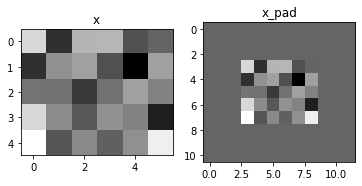

In [6]:
'''
作業修改
'''
np.random.seed(1)
x = np.random.randn(4, 5, 6, 7) #產生gray image
x_pad = zero_pad(x, 3) # 加3圈 Pad

print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape)
print ("x[1,1] =", x[1,1])
print ("x_pad[1,1] =", x_pad[1,1])
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

In [7]:
# GRADED FUNCTION: pool_forward
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    設計一個前行網路的池化層
    參數定義如下:
    A_prev -- 輸入的numpy 陣列, 維度 (m, n_H_prev, n_W_prev, n_C_prev)
    hparameter 超參數 --  "f" and "stride" 所形成的python 字典
    mode -- 池化的模式: "max" or "average"
    
    返回:
        A -- 輸出的池化層, 維度為 (m, n_H, n_W, n_C) 的 numpy 陣列
        cache -- 可以應用在 backward pass pooling layer 資料, 包含 input and hparameter
    """

    # 檢索尺寸 from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
 
    # 檢索超參數 from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]

    # 定義輸出的dimensions
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev

    # 初始化輸出的 matrix A
    A = np.zeros((m, n_H, n_W, n_C))

    ### 程式起始位置  ###
    for i in range(m): # 訓練樣本的for 迴圈
        for h in range(n_H): # 輸出樣本的for 迴圈, 針對vertical axis
            for w in range(n_W): #  輸出樣本的for 迴圈, 針對 horizontal axis
                for c in range (n_C): #  輸出樣本的for 迴圈, 針對channels

                     # 找出特徵圖的寬度跟高度四個點
                    vert_start = h * stride
                    vert_end = h * stride+ f
                    horiz_start = w * stride
                    horiz_end = w * stride + f

                    # 定義第i個訓練示例
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end,c]

                    # 計算輸入data 的池化結果. 使用 if statment 去做分類
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)

                        ### 程式結束  ###
    
    # 儲存輸入的特徵圖跟所設定的超參數, 可以用在 pool_backward()
    cache = (A_prev, hparameters)
    
    # 確認輸出的資料維度
    assert(A.shape == (m, n_H, n_W, n_C))
    return A, cache

In [8]:
'''
作業修改
np.random.seed(1)
A_prev = 
hparameters = 
'''
np.random.seed(1)
A_prev = np.random.randn(2, 3, 4, 5)
hparameters = {"stride" : 2, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A =", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A =", A)

mode = max
A = [[[[1.62434536 1.74481176 2.10025514 1.6924546  1.13376944]]]


 [[[1.19891788 1.25286816 1.51981682 2.18557541 1.12948391]]]]

mode = average
A = [[[[-0.24663934 -0.15010764 -0.23584096 -0.03170138  0.32987651]]]


 [[[-0.31437206  0.38599903  0.2975084   0.2360709   0.04968705]]]]


In [9]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 6)
hparameters = {"stride" : 1, "f": 2}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A =", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A =", A)

mode = max
A = [[[[ 1.74481176  0.2344157   1.65980218  0.74204416  1.46210794
    -0.0126646 ]
   [ 1.74481176  1.6924546   1.65980218  0.74204416  1.46210794
     2.10025514]
   [ 0.12015895  1.6924546   1.13376944  1.14472371  0.90159072
     2.10025514]
   [ 0.90085595  0.61720311  0.83898341  1.14472371  0.90159072
     0.88514116]]

  [[ 1.13162939  1.51981682  2.18557541  0.74204416  0.48851815
    -0.0126646 ]
   [ 1.13162939  1.6924546   2.18557541  0.74204416  0.19091548
     2.10025514]
   [ 0.23009474  1.6924546   0.31563495 -0.20075807  0.19091548
     2.10025514]
   [ 0.23009474  0.76201118  0.83898341  0.93110208  0.28558733
     1.12948391]]

  [[ 1.19891788  1.51981682  2.18557541  0.69803203  0.48851815
     1.2245077 ]
   [ 1.13162939  1.51981682  2.18557541  0.69803203  0.74055645
     1.2245077 ]
   [ 0.40349164  0.87616892  0.31563495  0.31515939  0.84616065
     0.82797464]
   [ 0.35054598  0.76201118 -0.03869551  0.37756379  1.12141771
     1.12948391]]

  [[ 1.